In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('features.csv', delimiter=',')

print(data.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(152, 1530)


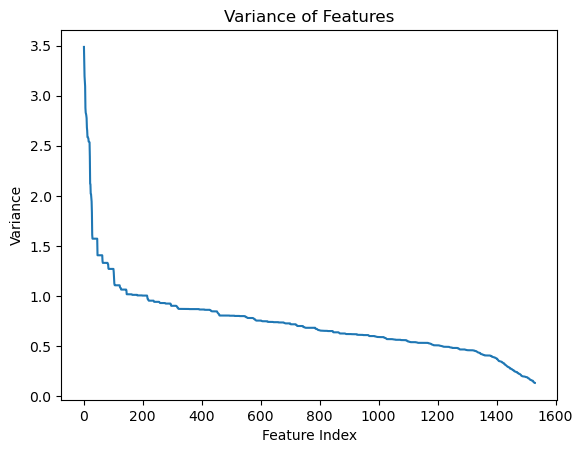

In [3]:
variances = np.var(data, axis=0)

sorted_variances = np.sort(variances)[::-1]
x = np.arange(1, len(sorted_variances) + 1)

plt.plot(x, sorted_variances)
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Variance of Features')
plt.show()

In [4]:
data_info = pd.read_csv('data_info.csv',usecols=[0,1])
data_info = data_info.loc[:120]
data_filt = data_info.dropna()

labels = data_filt.values[:,1]
aug_labels = np.array(labels) + np.random.normal(0, 1.5, len(labels))
aug_labels
y = aug_labels

dfX = pd.DataFrame(data)
subjects_list = data_filt['BASIC_INFO_ID'].unique().tolist()
sub_nums = [int(subject.split('-')[1]) for subject in subjects_list]
print(sub_nums)

arr = np.array(sub_nums)
existing_indices = arr - 1
dfXExisting = dfX.loc[existing_indices]
X = dfXExisting.values

X.shape,y.shape

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 34, 35, 36, 38, 39, 43, 44, 45, 46, 47, 49, 50, 52, 55, 56, 57, 58, 59, 60, 63, 64, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 100, 101, 103, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152]


((118, 1530), (118,))

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, np.arange(118), test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (94, 1530)
Testing set size: (24, 1530)


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [7]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
rf.feature_importances_

array([9.66932996e-04, 2.76420107e-04, 3.50867976e-04, ...,
       1.38148132e-06, 0.00000000e+00, 2.46402132e-05])

<BarContainer object of 1530 artists>

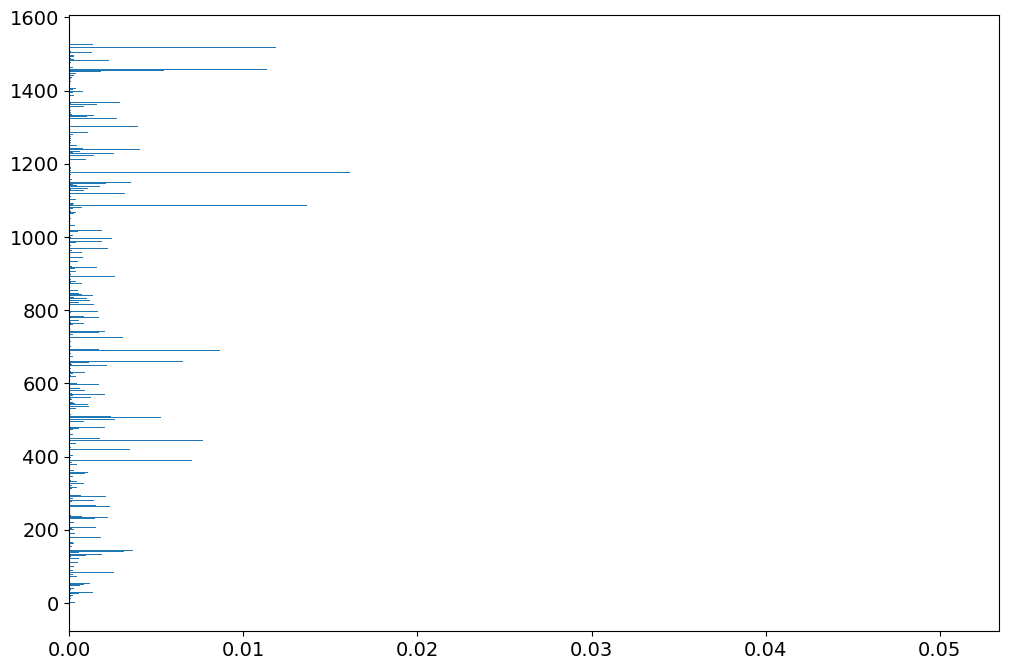

In [95]:
plt.barh(range(X_train.shape[1]), rf.feature_importances_)

Overall measures: 
Correlation: 0.8788437430371268
MAE:  4.70489055221024
R2:  0.6874963958743534


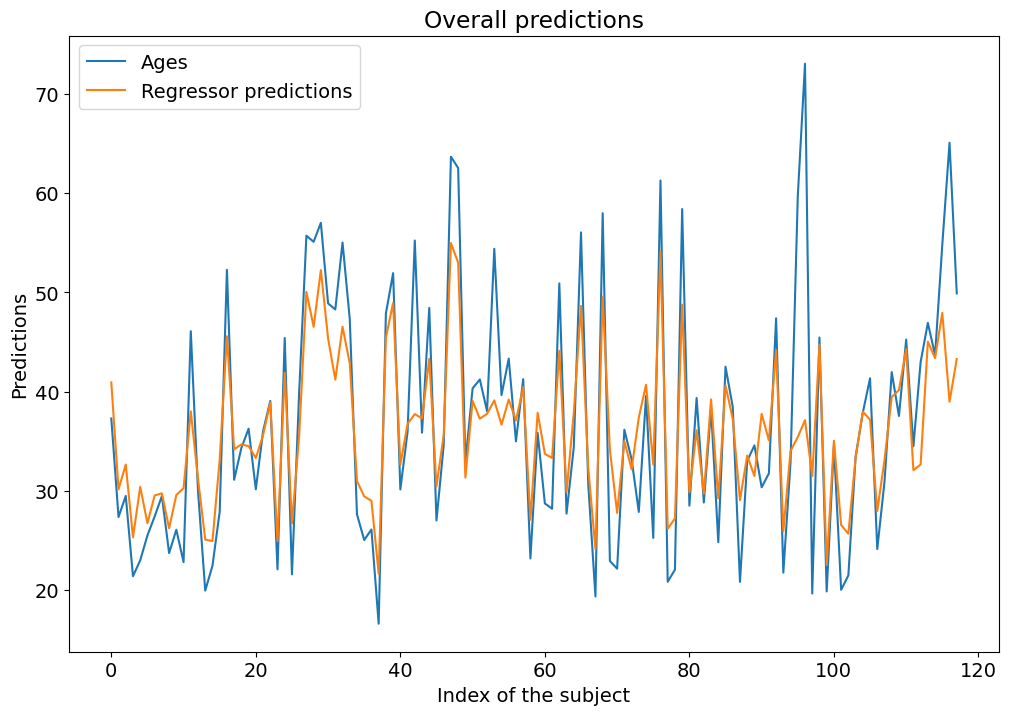

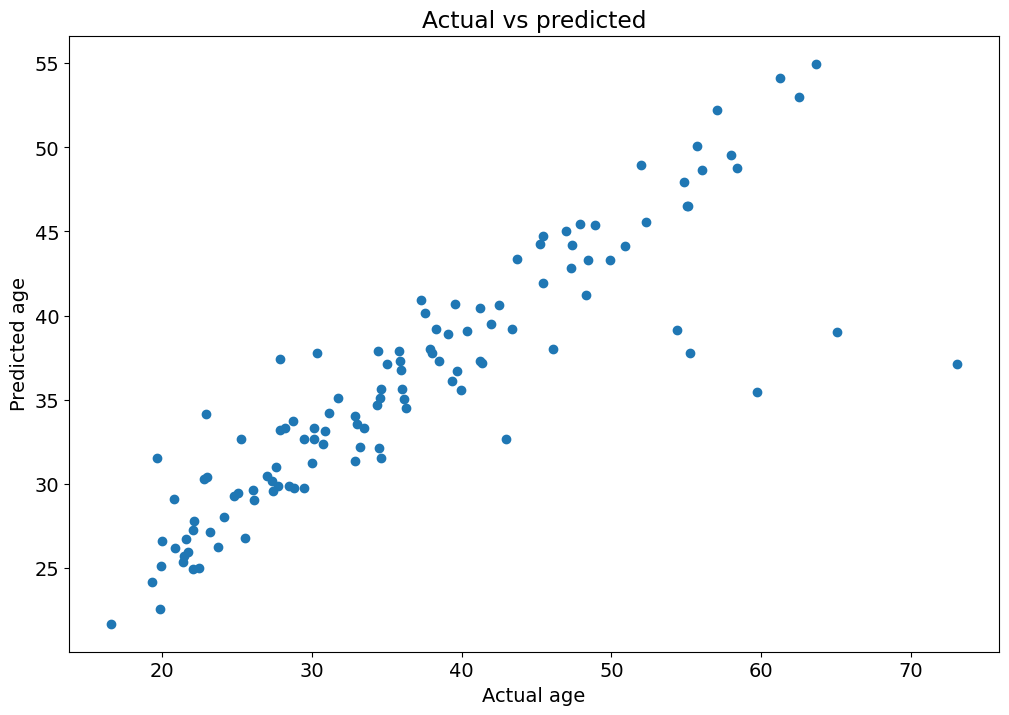

In [96]:
from scipy.stats import pearsonr

pred = rf.predict(X)

print("Overall measures: ")
corr,_ = pearsonr(pred,y)
print(f"Correlation: {corr}")

mae = sum(abs(rf.predict(X) - y))/len(y)
print("MAE: ",mae)

r2 = rf.score(X, y)
print("R2: ",r2)

x = range(len(y))

plt.plot(x, y, label='Ages')
plt.plot(x, pred, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.title("Overall predictions")
plt.legend()
plt.show()

plt.scatter(y, pred)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

Train measures: 
Correlation: 0.9773895098852299
MAE:  3.592497560713888
R2:  0.8640363882442239


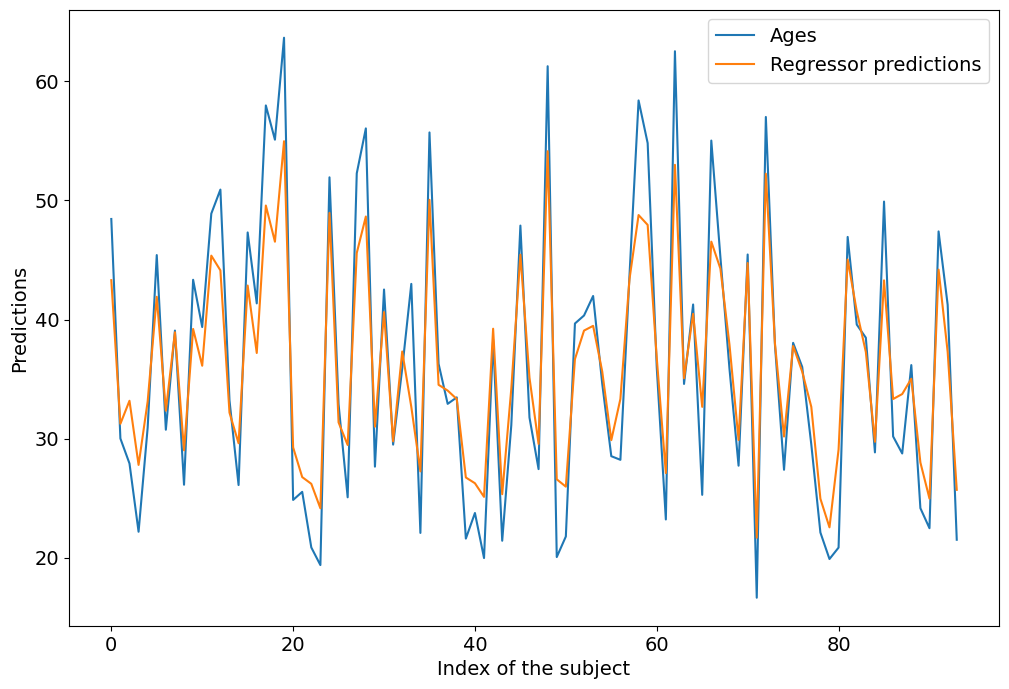

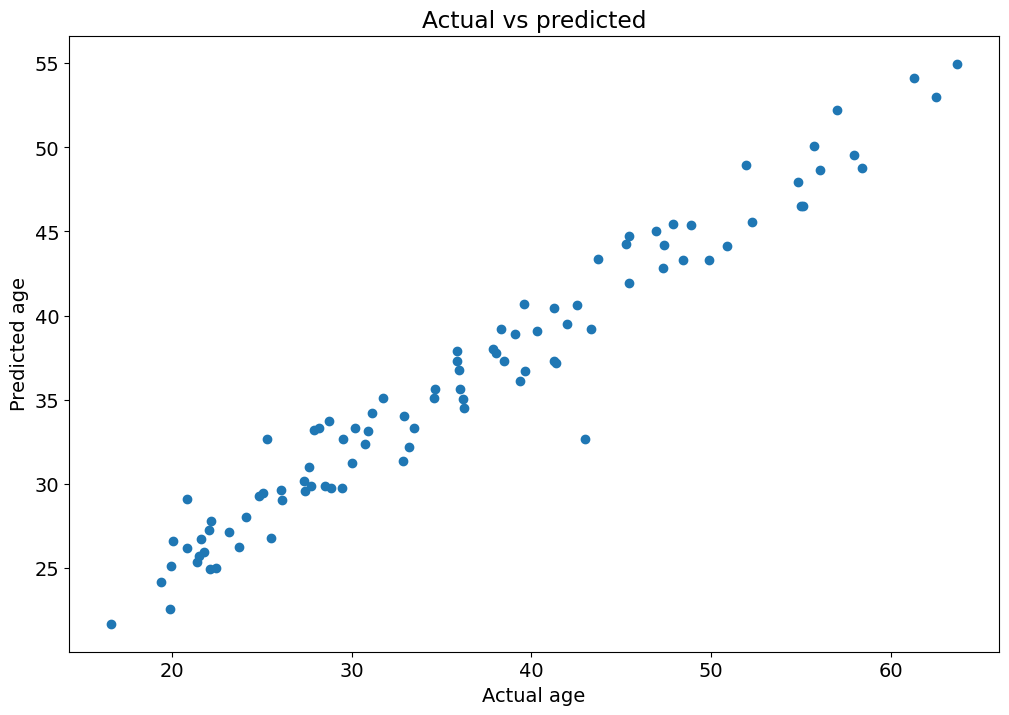

In [97]:
print("Train measures: ")
pred_tr = rf.predict(X_train)

corr_tr,_ = pearsonr(pred_tr,y_train)
print(f"Correlation: {corr_tr}")

mae_tr = sum(abs(pred_tr - y_train))/len(y_train)
print("MAE: ",mae_tr)

r2_tr = rf.score(X_train, y_train)
print("R2: ",r2_tr)

x_tr = range(len(y_train))

plt.plot(x_tr, y_train, label='Ages')
plt.plot(x_tr, pred_tr, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(y_train, pred_tr)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

Test measures: 
Correlation: 0.5626283672847772
MAE:  9.061763102237615
R2:  0.17051568099327952


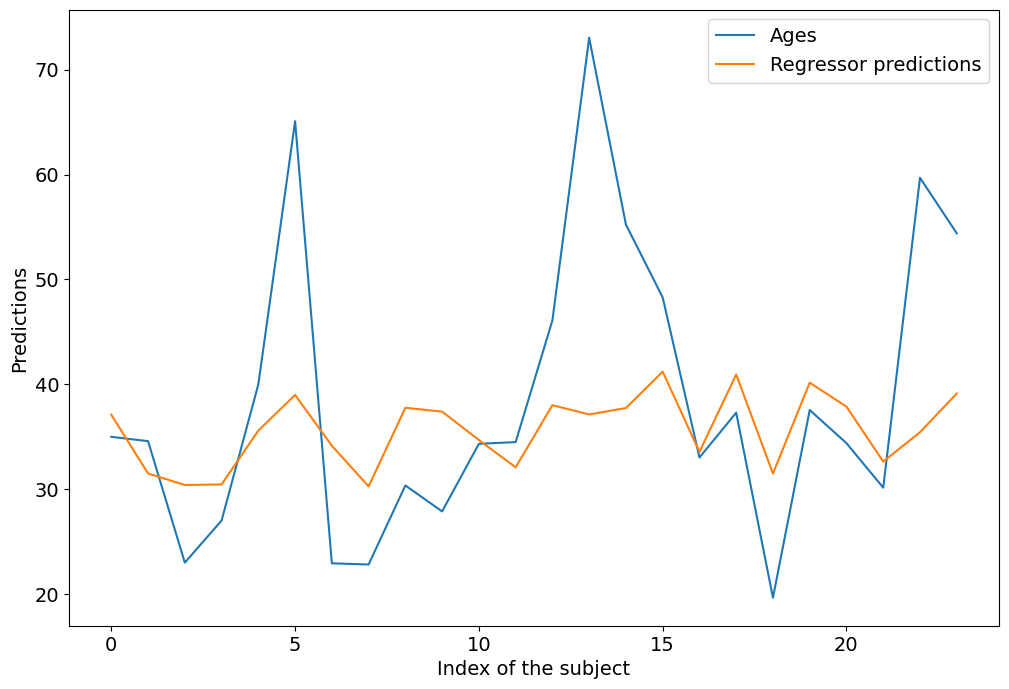

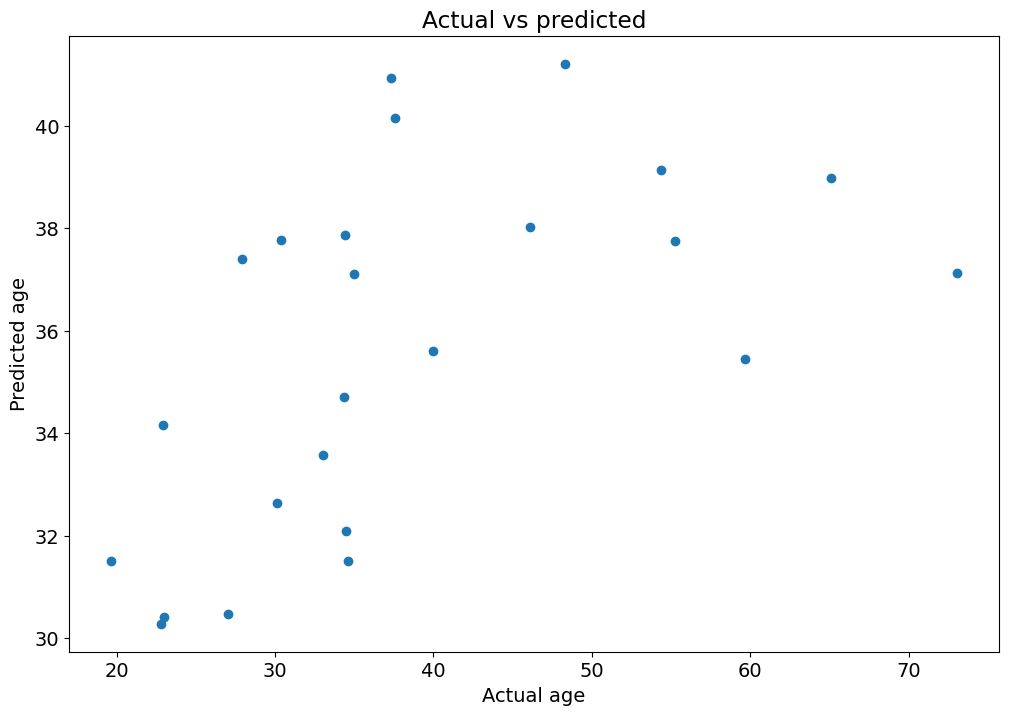

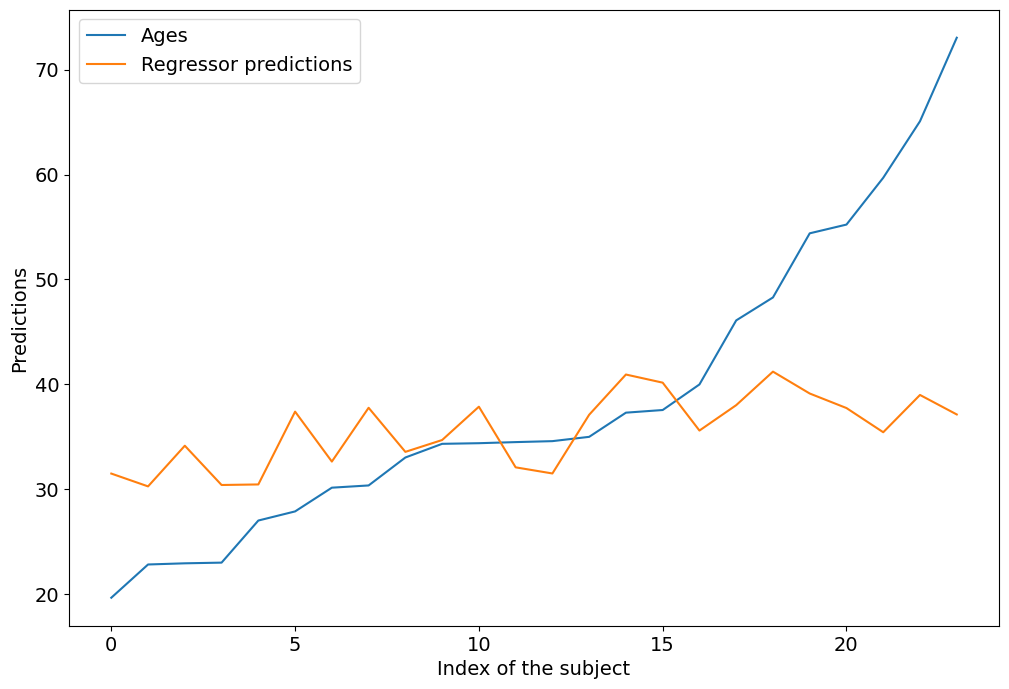

In [98]:
print("Test measures: ")
pred_t = rf.predict(X_test)

corr_t,_ = pearsonr(pred_t,y_test)
print(f"Correlation: {corr_t}")

mae_t = sum(abs(pred_t - y_test))/len(y_test)
print("MAE: ",mae_t)

r2_t = rf.score(X_test, y_test)
print("R2: ",r2_t)

x_t = range(len(y_test))

plt.plot(x_t, y_test, label='Ages')
plt.plot(x_t, pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(y_test, pred_t)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

# Sorted data

sorted_data = sorted(zip(y_test, pred_t))
sorted_y_test, sorted_pred_t = zip(*sorted_data)

plt.plot(x_t, sorted_y_test, label='Ages')
plt.plot(x_t, sorted_pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# There is clear overfitting!

Need to plot it against the original labels and not the augmented labels.

Overall measures: 
Correlation: 0.8738383442089874
MAE:  4.7885209720193735
R2:  0.6874963958743534


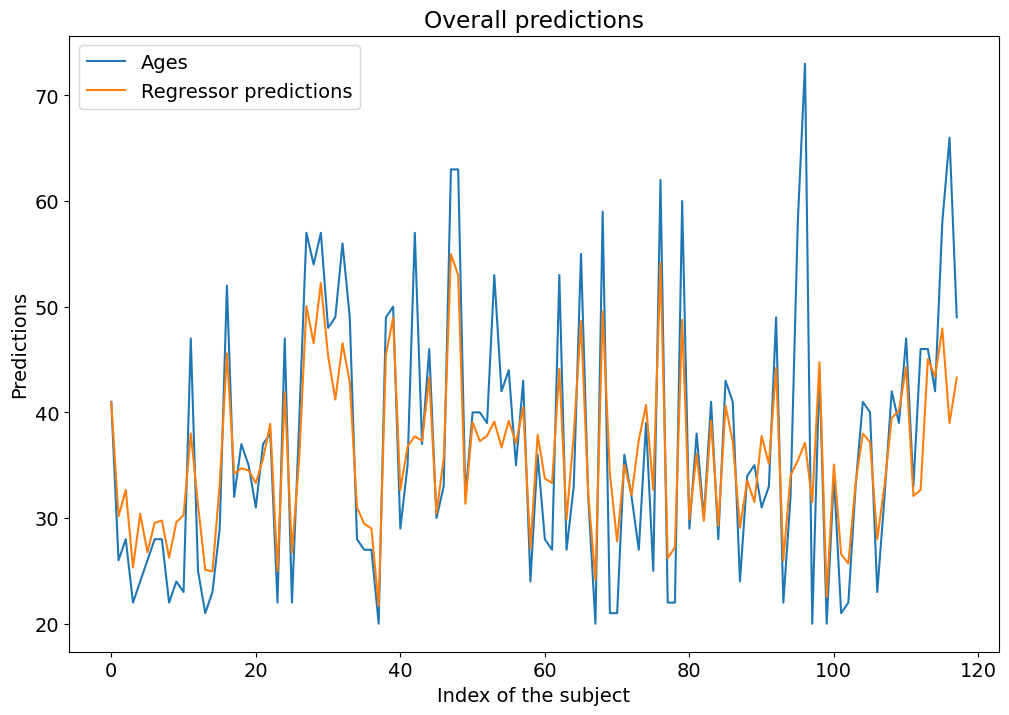

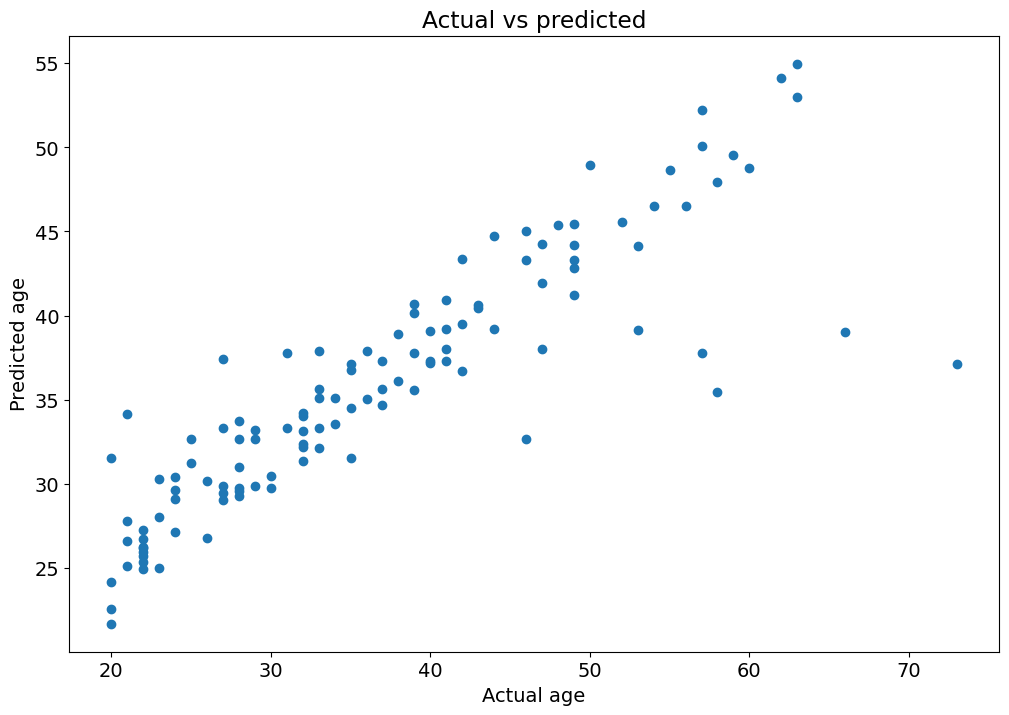

In [99]:
from scipy.stats import pearsonr

pred = rf.predict(X)

print("Overall measures: ")
corr,_ = pearsonr(pred,labels)
print(f"Correlation: {corr}")

mae = sum(abs(rf.predict(X) - labels))/len(labels)
print("MAE: ",mae)

r2 = rf.score(X, y)
print("R2: ",r2)

x = range(len(y))

plt.plot(x, labels, label='Ages')
plt.plot(x, pred, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.title("Overall predictions")
plt.legend()
plt.show()

plt.scatter(labels, pred)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

In [100]:
from scipy import stats

slope,intercept, r, p, s = stats.linregress(labels.astype(float), pred)
slope, intercept

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(0.5160890834801117, 16.895620548040977)

Train measures: 
Correlation: 0.969296244086625
MAE:  3.7378855546938414
R2:  0.8495923048174515


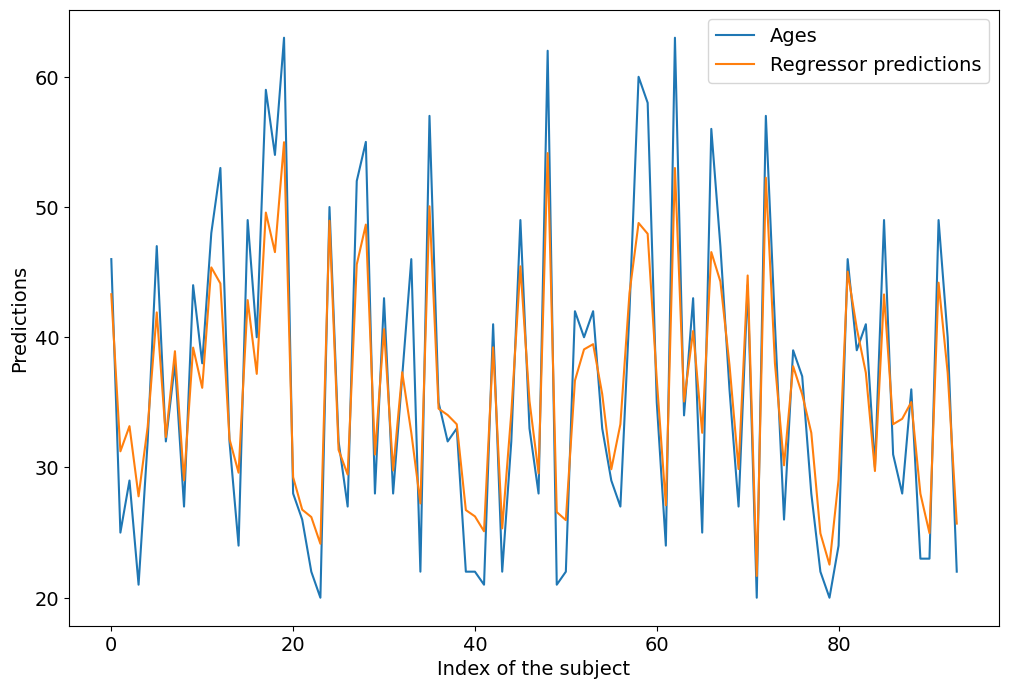

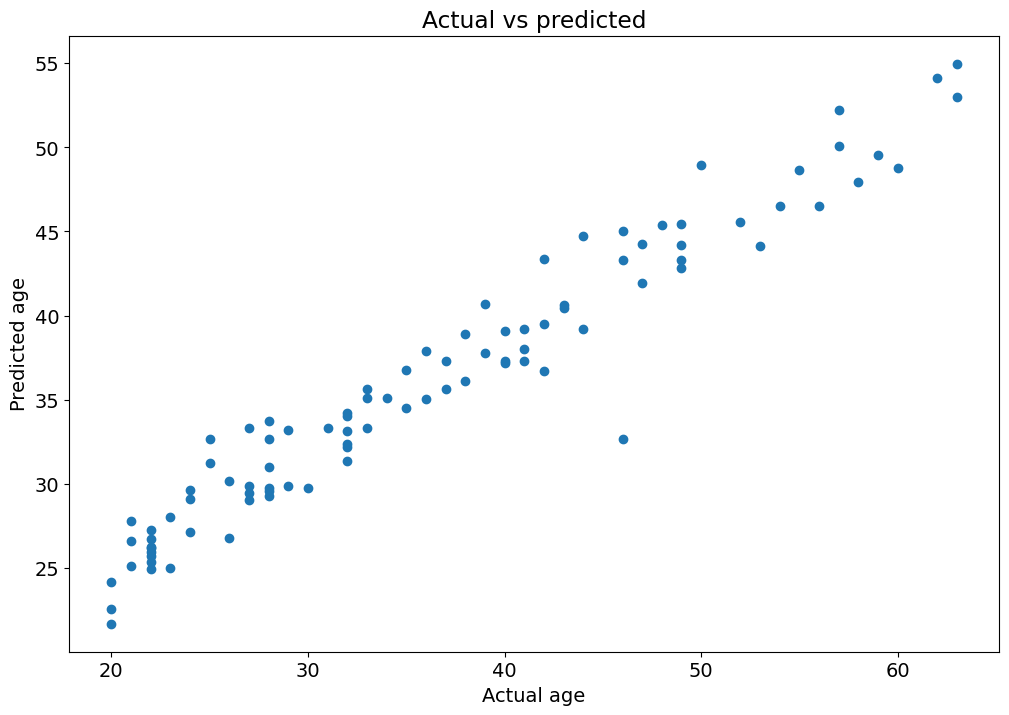

In [101]:
print("Train measures: ")
pred_tr = rf.predict(X_train)
label_tr = labels[indices_train]

corr_tr,_ = pearsonr(pred_tr,label_tr)
print(f"Correlation: {corr_tr}")

mae_tr = sum(abs(pred_tr - label_tr))/len(label_tr)
print("MAE: ",mae_tr)

r2_tr = rf.score(X_train, label_tr)
print("R2: ",r2_tr)

x_tr = range(len(label_tr))

plt.plot(x_tr, label_tr, label='Ages')
plt.plot(x_tr, pred_tr, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(label_tr, pred_tr)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

In [102]:
slope_tr,intercept_tr, r, p, s = stats.linregress(label_tr.astype(float), pred_tr)
slope_tr, intercept_tr

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(0.6507372917748159, 12.323461760703609)

Test measures: 
Correlation: 0.5738754975776376
MAE:  8.903509689877694
R2:  0.16578956282973234


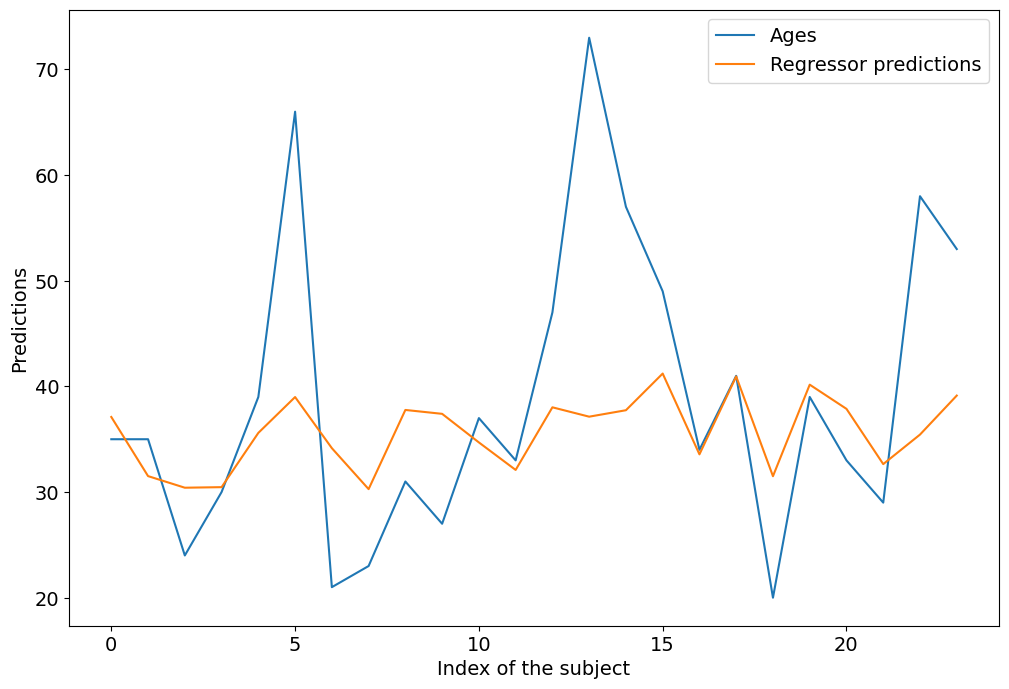

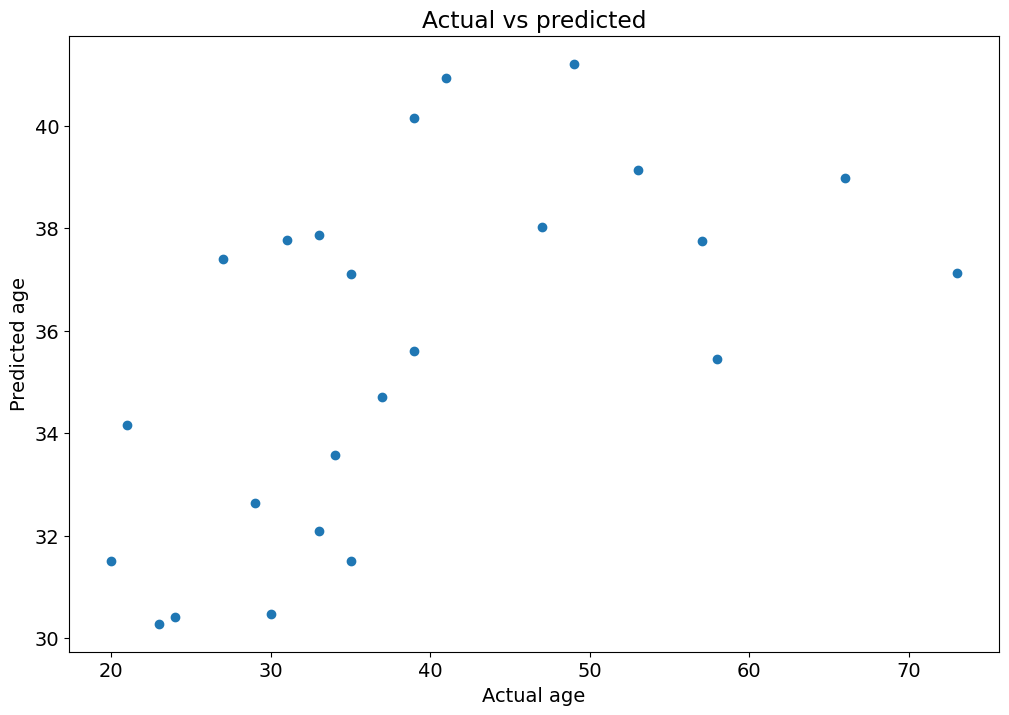

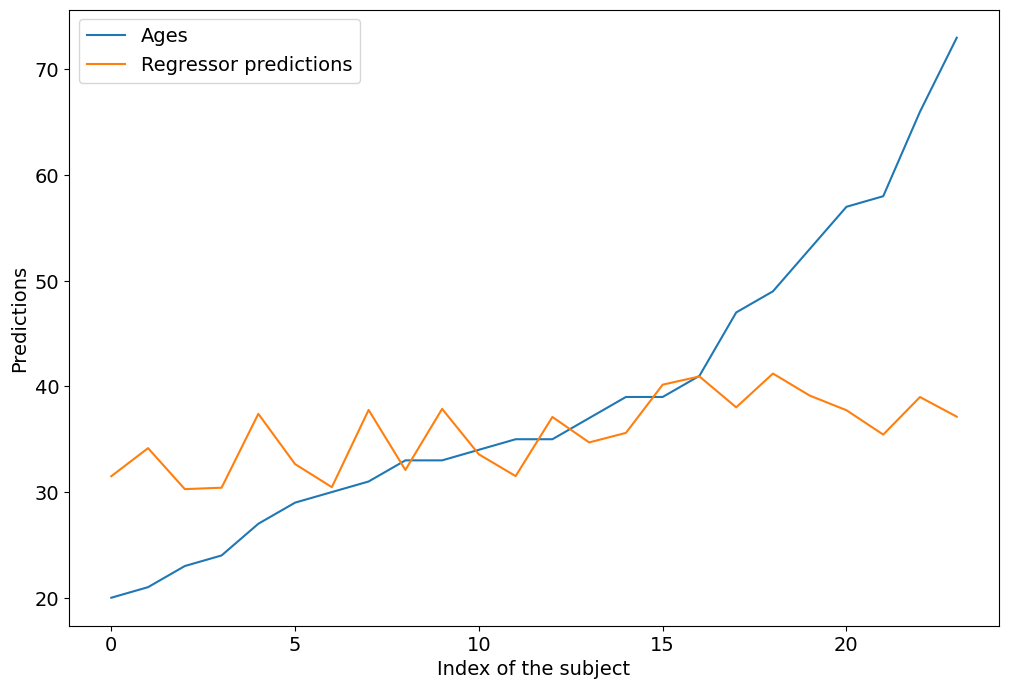

In [103]:
print("Test measures: ")
pred_t = rf.predict(X_test)
label_t = labels[indices_test]

corr_t,_ = pearsonr(pred_t,label_t)
print(f"Correlation: {corr_t}")

mae_t = sum(abs(pred_t - label_t))/len(label_t)
print("MAE: ",mae_t)

r2_t = rf.score(X_test, label_t)
print("R2: ",r2_t)

x_t = range(len(label_t))

plt.plot(x_t, label_t, label='Ages')
plt.plot(x_t, pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(label_t, pred_t)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

# Sorted data

sorted_data = sorted(zip(label_t, pred_t))
sorted_y_test, sorted_pred_t = zip(*sorted_data)

plt.plot(x_t, sorted_y_test, label='Ages')
plt.plot(x_t, sorted_pred_t, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [104]:
slope_t,intercept_t, r, p, s = stats.linregress(label_t.astype(float), pred_t)
slope_t, intercept_t

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(0.14029706989078078, 30.201172917882506)

In [105]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

rfcv = RandomForestRegressor(n_estimators=100)

fold_errors = []

y = aug_labels

kf = KFold(n_splits=10, shuffle=True)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    labels_train, labels_val = labels[train_index],labels[val_index]
    
    rfcv.fit(X_train, y_train)
    
    y_pred = rfcv.predict(X_val)
    fold_error = mean_absolute_error(labels_val, y_pred)
    
    fold_errors.append(fold_error)

for i, error in enumerate(fold_errors):
    print(f"Iteration {i+1}: Validation Error = {error}")

print("Average validation error: ", np.mean(fold_errors))

Iteration 1: Validation Error = 8.569850629256143
Iteration 2: Validation Error = 8.505061923530725
Iteration 3: Validation Error = 7.046444299877884
Iteration 4: Validation Error = 11.363765220225682
Iteration 5: Validation Error = 10.463647299219263
Iteration 6: Validation Error = 9.454924062169818
Iteration 7: Validation Error = 9.441967053843173
Iteration 8: Validation Error = 12.485720867303266
Iteration 9: Validation Error = 8.752154519206995
Iteration 10: Validation Error = 10.774753711677677
Average validation error:  9.685828958631062


Trying a grid search using whatever parameters we have now to reduce overfitting of train data (which is causing low validation accuracy)

In [57]:
# Labels are stored in the variable 'labels'
# Rest of the data features are stored in 'X'
sigma = 2
n_estimators = 100
sigmas = [1,1.5,2,2.5,3]
ns = [25,50,75, 100,125,150]

errors = []

for sigma in sigmas:
    for n_estimators in ns:
        aug_labels_gs = np.array(labels) + np.random.normal(0, sigma, len(labels))
        Xgs = X
        ygs = aug_labels_gs
        labels_gs = labels

        rfgs = RandomForestRegressor(n_estimators=n_estimators)

        fold_errors = []

        kf = KFold(n_splits=10, shuffle=True)

        for train_index, val_index in kf.split(X):
            X_train, X_val = Xgs[train_index], Xgs[val_index]
            y_train, y_val = ygs[train_index], ygs[val_index]
            labels_train, labels_val = labels_gs[train_index],labels_gs[val_index]
            
            rfcv.fit(X_train, y_train)
            
            y_pred = rfcv.predict(X_val)
            fold_error = mean_absolute_error(labels_val, y_pred)
            
            fold_errors.append(fold_error)

        for i, error in enumerate(fold_errors):
            print(f"Iteration {i+1}: Validation Error = {error}")

        avg_val_err = np.mean(fold_errors)
        print("Average validation error: ", avg_val_err)
        errors.append(avg_val_err)


Iteration 1: Validation Error = 9.454303164554142
Iteration 2: Validation Error = 6.912107946386477
Iteration 3: Validation Error = 13.31946751152954
Iteration 4: Validation Error = 10.434031571821757
Iteration 5: Validation Error = 12.206516431547664
Iteration 6: Validation Error = 8.151048760118583
Iteration 7: Validation Error = 6.395782269773822
Iteration 8: Validation Error = 8.482922192271815
Iteration 9: Validation Error = 12.871603384305553
Iteration 10: Validation Error = 9.039062253340989
Average validation error:  9.726684548565036
Iteration 1: Validation Error = 10.204625378092679
Iteration 2: Validation Error = 12.229924557075263
Iteration 3: Validation Error = 7.118554669636357
Iteration 4: Validation Error = 7.676413966871141
Iteration 5: Validation Error = 7.399844003468676
Iteration 6: Validation Error = 11.561977148517528
Iteration 7: Validation Error = 8.366367116373267
Iteration 8: Validation Error = 14.323468655919207
Iteration 9: Validation Error = 10.896919197871

In [58]:
for i in range(len(sigmas)):
    for j in range(len(ns)):
        print(sigmas[i],ns[j],errors[len(sigmas)*i+j])

print(min(errors),errors.index(min(errors)))

1 25 9.726684548565036
1 50 9.921080426363165
1 75 9.898382565084308
1 100 10.02442138388607
1 125 9.911925385052314
1 150 9.529369815439125
1.5 25 9.529369815439125
1.5 50 9.797409671371325
1.5 75 9.694741804085755
1.5 100 9.484520257477282
1.5 125 9.97056721657933
1.5 150 9.517488921082272
2 25 9.517488921082272
2 50 9.763994281227749
2 75 9.70821195456649
2 100 9.61031646020313
2 125 9.584790143695805
2 150 9.566373663865484
2.5 25 9.566373663865484
2.5 50 9.615914023192337
2.5 75 9.536114674328132
2.5 100 10.23461938839791
2.5 125 10.138875311562112
2.5 150 9.778930562023747
3 25 9.778930562023747
3 50 9.77870784248524
3 75 9.468091746585563
3 100 9.681145298445669
3 125 9.921773641760728
3 150 9.91191159396329
9.468091746585563 22


0 25
1 50
2 75
3 100
4 125
5 150


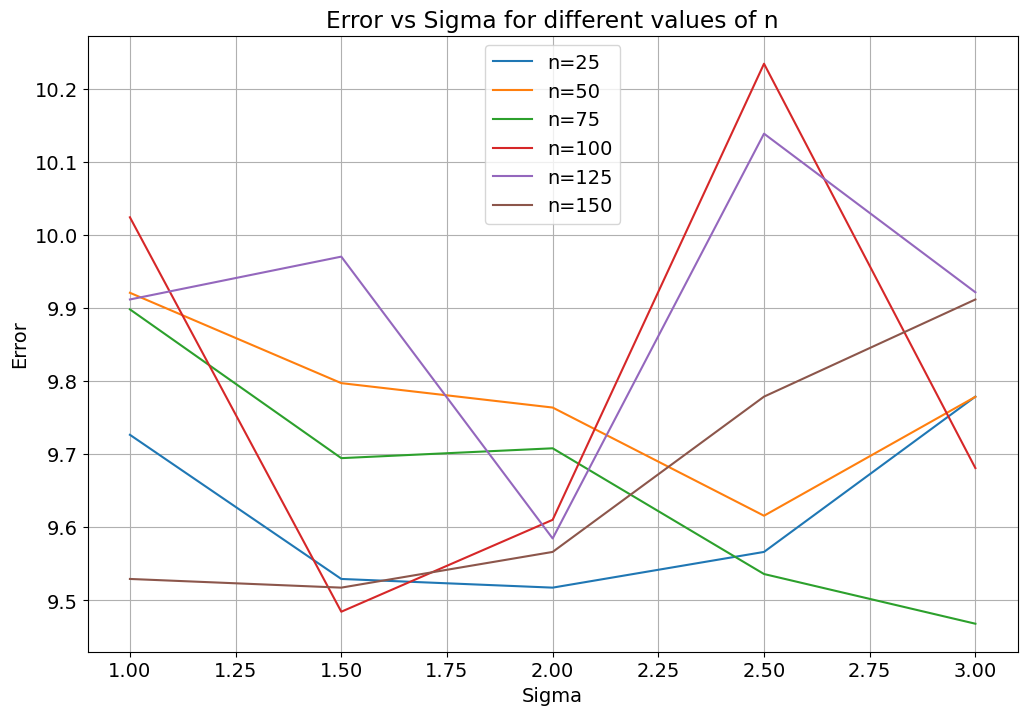

In [59]:
for j, n in enumerate(ns):
    print(j,n)
    plt.plot(sigmas, [errors[len(sigmas)*i+j] for i in range(len(sigmas))], label=f'n={n}')

plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Error vs Sigma for different values of n')
plt.legend()
plt.grid(True)
plt.show()

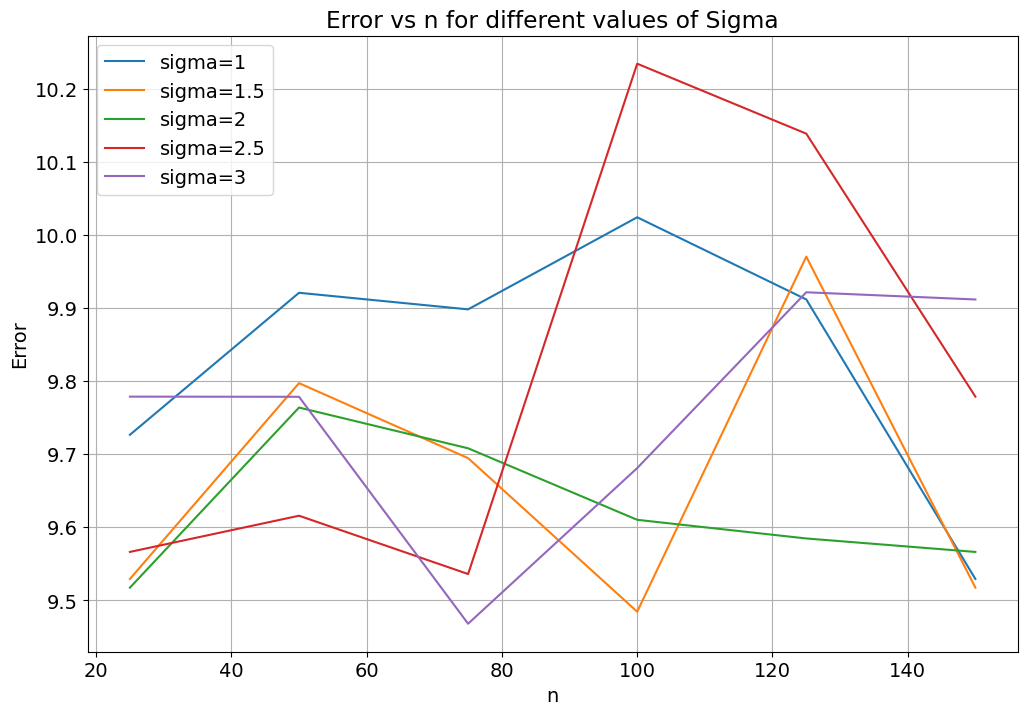

In [60]:
for i, sigma in enumerate(sigmas):
    plt.plot(ns, [errors[len(sigmas)*i+j] for j in range(len(ns))], label=f'sigma={sigma}')

plt.xlabel('n')
plt.ylabel('Error')
plt.title('Error vs n for different values of Sigma')
plt.legend()
plt.grid(True)
plt.show()

## n = 100, sigma = 1.5 is the best set of values

### Now since we have the slope and intercept, I'll apply that linear correction to the entire dataset based on values of slope and intercept of the entire dataset. Then I'll look into train and test accuracy and see how everything looks then.

In [106]:
pred_c = (pred-intercept_tr)/slope_tr

Overall measures: 
Correlation: 0.8738383442089876
MAE:  4.865576575486653
R2:  0.6874963958743534


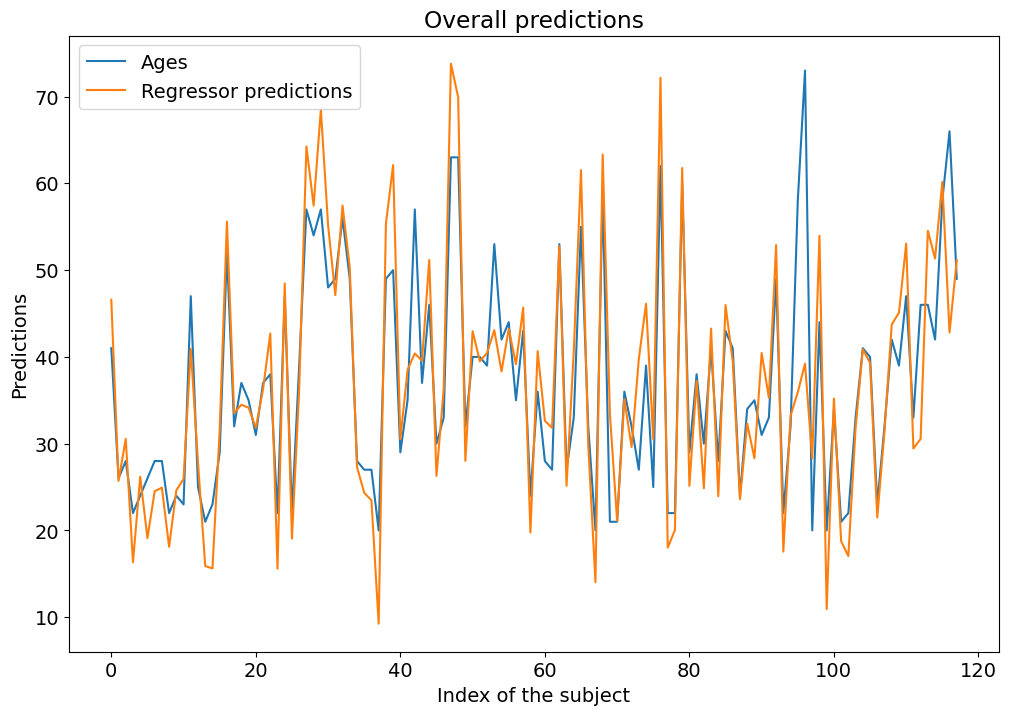

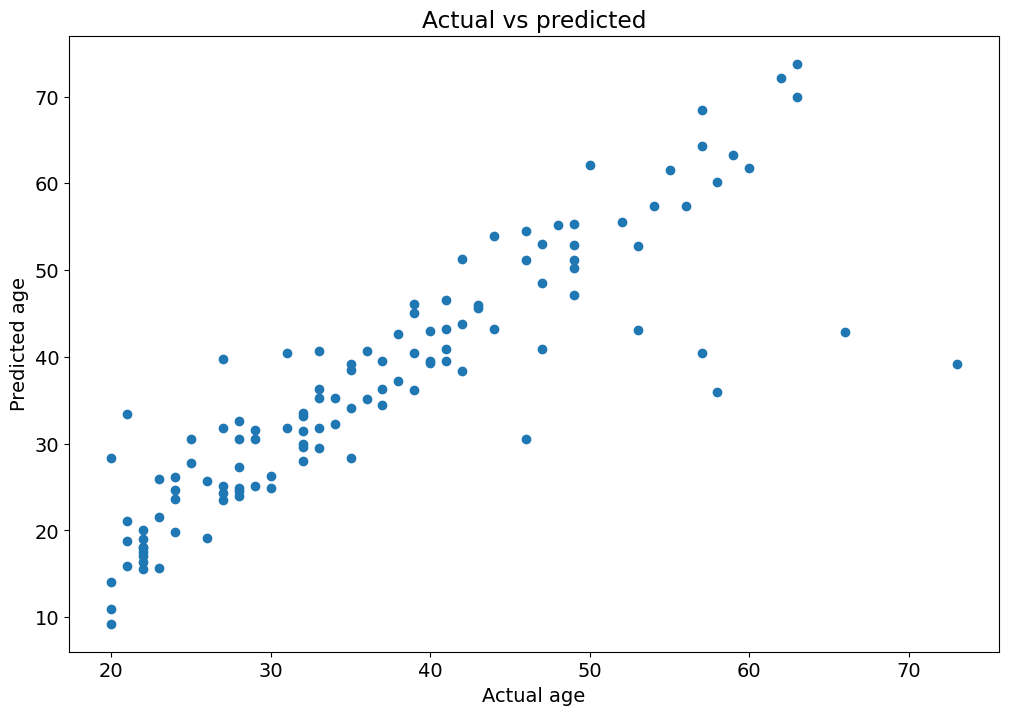

In [107]:
print("Overall measures: ")
corr,_ = pearsonr(pred_c,labels)
print(f"Correlation: {corr}")

mae = sum(abs(pred_c - labels))/len(labels)
print("MAE: ",mae)

r2 = rf.score(X, y)
print("R2: ",r2)

x = range(len(y))

plt.plot(x, labels, label='Ages')
plt.plot(x, pred_c, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.title("Overall predictions")
plt.legend()
plt.show()

plt.scatter(labels, pred_c)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

In [108]:
pred_trc = (pred_tr-intercept_tr)/slope_tr
pred_tr.shape

(94,)

Correlation: 0.9692962440866247
MAE:  3.900971801467854
R2:  0.8495923048174515


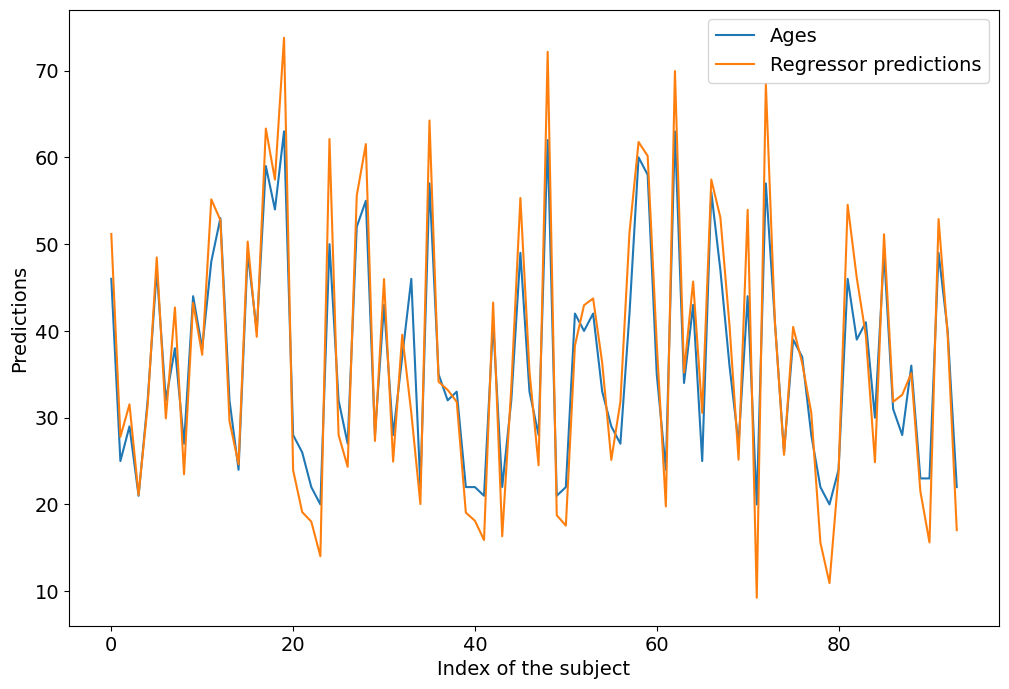

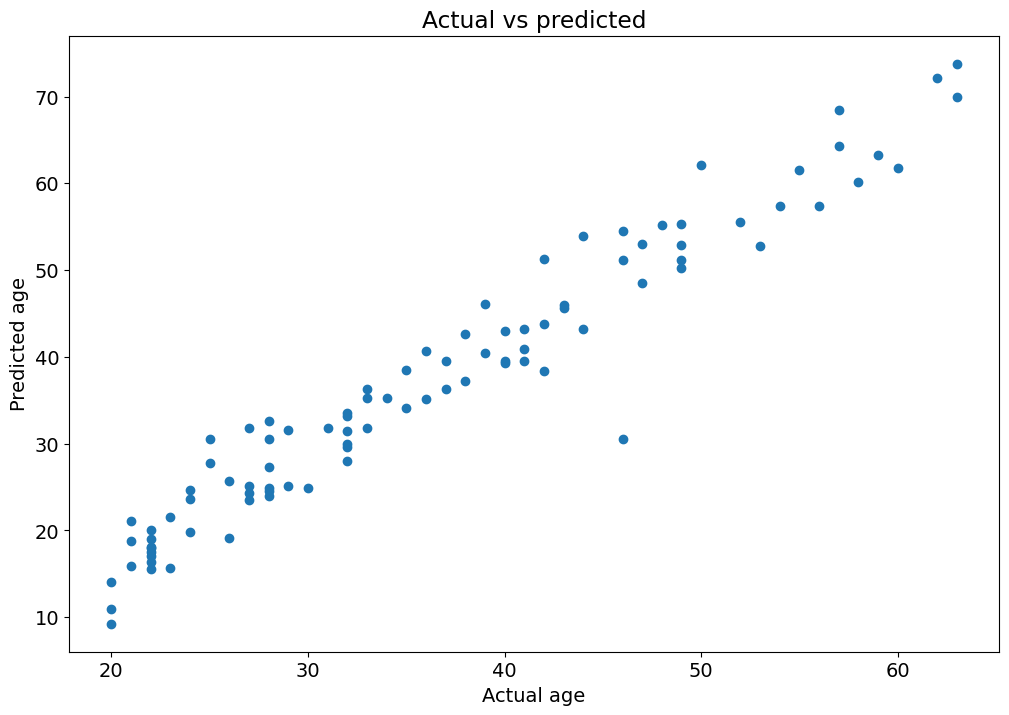

In [109]:
label_tr = labels[indices_train]
corr_tr,_ = pearsonr(pred_trc,label_tr)
print(f"Correlation: {corr_tr}")

mae_tr = sum(abs(pred_trc - label_tr))/len(label_tr)
print("MAE: ",mae_tr)

r2_tr = rf.score(X[indices_train], label_tr)
print("R2: ",r2_tr)

x_tr = range(len(label_tr))

plt.plot(x_tr, label_tr, label='Ages')
plt.plot(x_tr, pred_trc, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(label_tr, pred_trc)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

In [110]:
pred_tc = (pred_t-intercept_tr)/slope_tr
pred_tc.shape

(24,)

Correlation: 0.5738754975776377
MAE:  8.643611940393603
R2:  0.16578956282973234


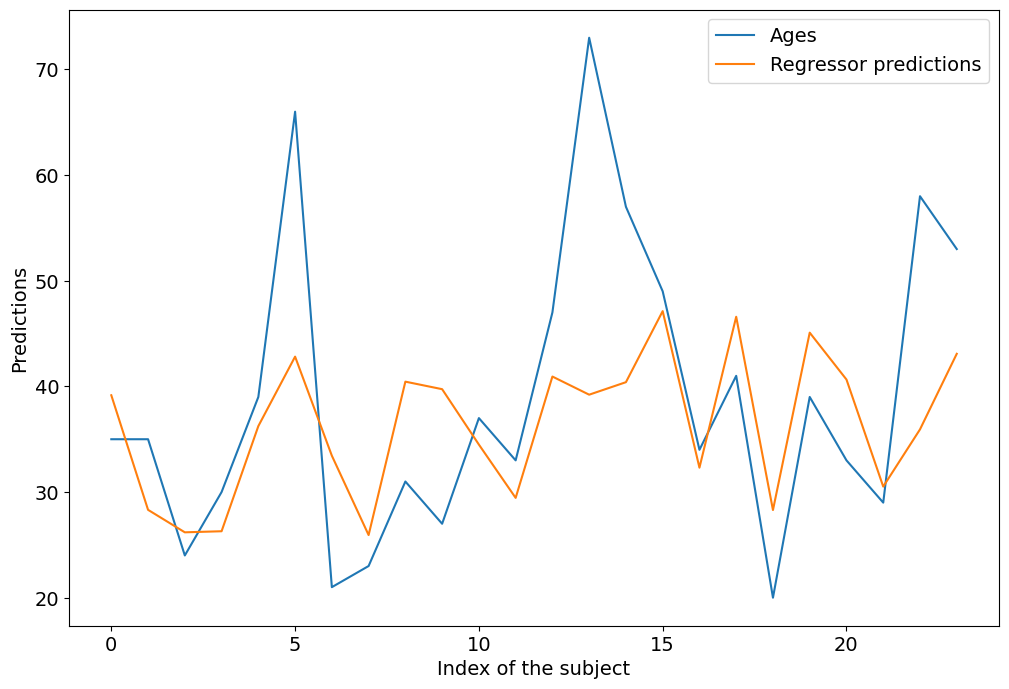

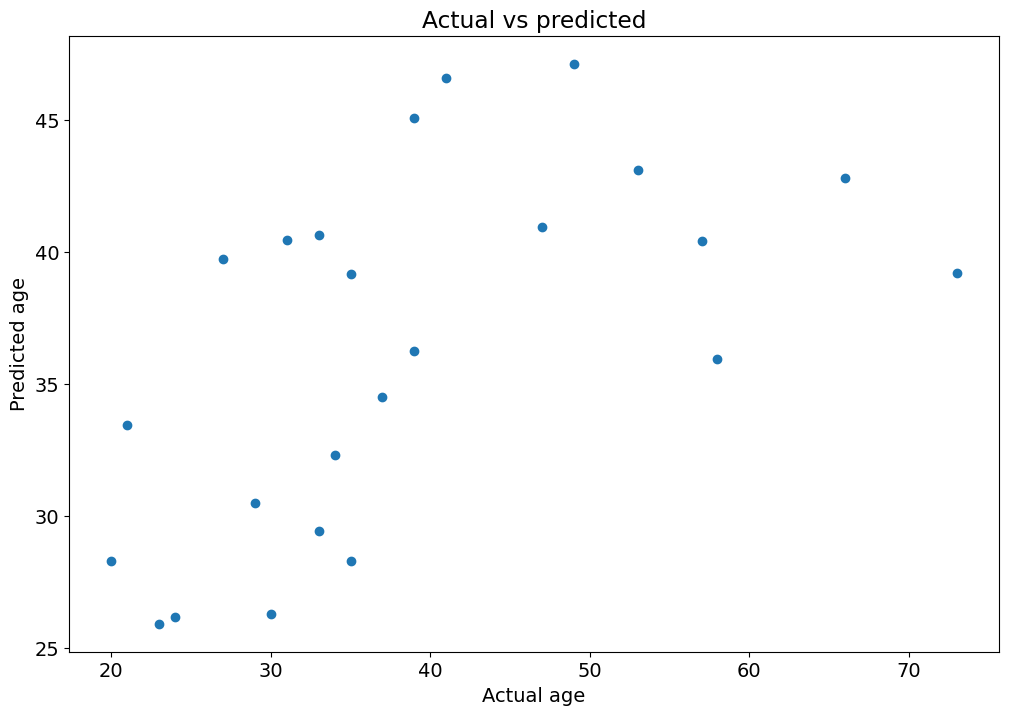

In [111]:
label_t = labels[indices_test]
corr_t,_ = pearsonr(pred_tc,label_t)
print(f"Correlation: {corr_t}")

mae_t = sum(abs(pred_tc - label_t))/len(label_t)
print("MAE: ",mae_t)

r2_t = rf.score(X[indices_test], label_t)
print("R2: ",r2_t)

x_t = range(len(label_t))

plt.plot(x_t, label_t, label='Ages')
plt.plot(x_t, pred_tc, label='Regressor predictions')
plt.xlabel('Index of the subject')
plt.ylabel('Predictions')
plt.legend()
plt.show()

plt.scatter(label_t, pred_tc)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.title('Actual vs predicted')
plt.show()

In [116]:
rfcv_c = RandomForestRegressor(n_estimators=100)

fold_errors_c = []

y = aug_labels

kf_c = KFold(n_splits=10, shuffle=True)

for train_index, val_index in kf_c.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    labels_train, labels_val = labels[train_index],labels[val_index]
    
    rfcv_c.fit(X_train, y_train)

    y_tr_pred = rfcv_c.predict(X_train)
    
    y_pred = rfcv_c.predict(X_val)

    # Finding slope and intercept of the train data and train predictions alone
    slope_tr,intercept_tr, r, p, s = stats.linregress(labels_train.astype(float), y_tr_pred)

    # Correcting the validation prediction using the intercept derived from train data
    y_pred = (y_pred - intercept_tr)/slope_tr

    fold_error = mean_absolute_error(labels_val, y_pred)
    
    fold_errors.append(fold_error)

for i, error in enumerate(fold_errors):
    print(f"Iteration {i+1}: Validation Error = {error}")

print("Average validation error: ", np.mean(fold_errors))
print("Median validation error: ", np.median(fold_errors))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Now, I'll work on augmenting the features as well and creating more datapoints.